In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
returns = pd.read_csv('data/returns.csv')
returns.head()

,Date,AAPL,GOOGL,HPQ,MSFT,SNE
0,2010-01-05,0.001729,-0.004404,0.004194,0.000323,-0.004664
1,2010-01-06,-0.015906,-0.025209,-0.009303,-0.006137,-0.001004
2,2010-01-07,-0.001849,-0.023280,0.000383,-0.010400,-0.001675
3,2010-01-08,0.006648,0.013331,0.007471,0.006897,0.020470
4,2010-01-11,-0.008822,-0.001512,-0.003042,-0.012720,0.006248


In [3]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2571 non-null   object 
 1   AAPL    2571 non-null   float64
 2   GOOGL   2571 non-null   float64
 3   HPQ     2571 non-null   float64
 4   MSFT    2571 non-null   float64
 5   SNE     2571 non-null   float64
dtypes: float64(5), object(1)
memory usage: 110.5+ KB


In [4]:
returns.describe()

,AAPL,GOOGL,HPQ,MSFT,SNE
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,0.000923,0.000598,-0.000002,0.000696,0.000434
std,0.017131,0.015923,0.020476,0.015471,0.020718
min,-0.128647,-0.116342,-0.200271,-0.147390,-0.111740
25%,-0.007022,-0.006600,-0.008631,-0.006788,-0.010678
50%,0.000886,0.000553,0.000429,0.000529,0.000000
75%,0.009874,0.008460,0.009544,0.008327,0.010979
max,0.119808,0.162584,0.170984,0.142169,0.176934


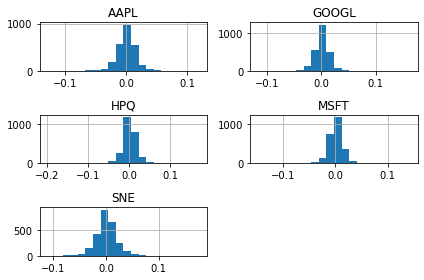

In [5]:
#plots show the returns for each company are represented by a normal distribution
_ = returns.hist(bins=20)
_ = plt.tight_layout()

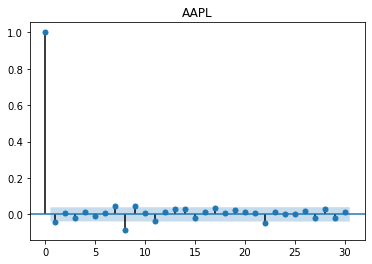

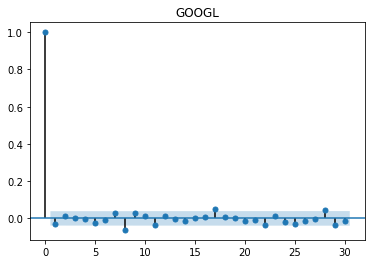

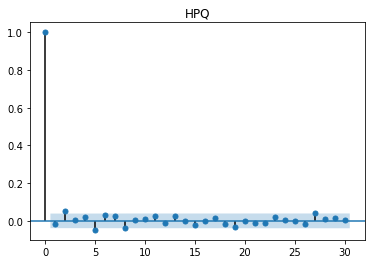

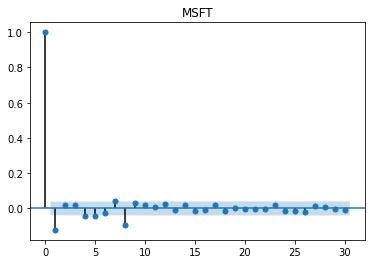

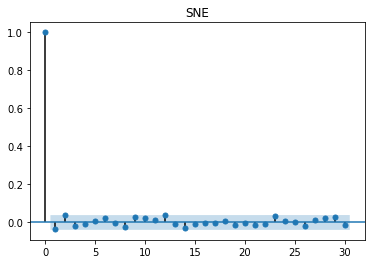

In [6]:
# plot the autocorrelation for each tech company to determine if the past will help predict the future

for com in returns.columns[1:]:
    plot_acf(returns[com],lags=30)
    plt.title(com)
    plt.show()

The only companies which past data will help forecast the future are Apple and Microsoft as the rest of the technology companies autocorrelations are close to zero.

In [7]:
# split each column and see if the mean and variance is roughly the same. This will help check for stationarity.

for companies in returns.columns[1:]:
    company = returns[companies]
    split = round(len(company)/2)
    X_1,X_2 = company[:split], company[split:]
    mean_1,mean_2 = X_1.mean(), X_2.mean()
    var_1,var_2 = X_1.var(), X_2.var()
    print('For {}'.format(companies))
    print('mean1=%f, mean2=%f' % (mean_1, mean_2))
    print('variance1=%f, variance2=%f' % (var_1, var_2))
    print('')

For AAPL
mean1=0.001247, mean2=0.000598
variance1=0.000285, variance2=0.000302

For GOOGL
mean1=0.000554, mean2=0.000642
variance1=0.000247, variance2=0.000261

For HPQ
mean1=-0.000019, mean2=0.000015
variance1=0.000442, variance2=0.000397

For MSFT
mean1=0.000359, mean2=0.001033
variance1=0.000203, variance2=0.000276

For SNE
mean1=0.000162, mean2=0.000707
variance1=0.000484, variance2=0.000375



In [8]:
# showing if returns are a random walk for every company
# H_o :  The companies follow a random walk with an 5% confidence interval.
# H_1 : The companies are stationary

for com in returns.columns[1:]:
    result = adfuller(returns[com])
    print('ADF Statistic: %f' % result[0])
    print('The p-value for {} is {}'.format(com,result[1]))
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.579841
The p-value for AAPL is 1.9388923264778066e-28
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -15.830029
The p-value for GOOGL is 9.968433667914084e-29
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -17.581615
The p-value for HPQ is 4.0046819110001386e-30
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -20.588421
The p-value for MSFT is 0.0
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -35.156443
The p-value for SNE is 0.0
	1%: -3.433
	5%: -2.863
	10%: -2.567


This shows strong evidence that every company does not follow a random walk, proving each companies returns is stationary.This is shown by a negative ADF value and a p-value less than 5%.  

In [9]:
#standardize the returns data

standardized_list = []


for companies in returns.columns[1:]:
    
    company = returns[[companies]].values
    
    scaler = StandardScaler()
    scaler = scaler.fit(company)
    standardized = scaler.transform(company)
    
    standardized = standardized.reshape(len(standardized))
    standardized_list.append(standardized)


company_names = [names for names in returns.columns[1:]]
standardized_dict = dict(zip(company_names,standardized_list))


standardized_df = pd.DataFrame(standardized_dict)
standardized_df.head()


,AAPL,GOOGL,HPQ,MSFT,SNE
0,0.047066,-0.314156,0.204983,-0.024091,-0.246104
1,-0.982544,-1.621008,-0.454330,-0.441732,-0.069430
2,-0.161800,-1.499830,0.018821,-0.717326,-0.101829
3,0.334283,0.799837,0.365041,0.400888,0.967249
4,-0.568911,-0.132490,-0.148511,-0.867342,0.280668


In [10]:
# going to predict apple returns.

X = standardized_df.drop(['AAPL'],axis=1)
y = standardized_df['MSFT'].values

#split the dataset into train and test

X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
